# 環境與資料匯入

In [ ]:
import os
import urllib.request

Mounted at /content/drive


In [ ]:
weather_dataset_data_url = 'https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/reportdaily_mean_fillna.csv'
price_data_url = 'https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/lynnbai/dataset/Banana.csv'
if not os.path.exists('weather_dataset.csv'): urllib.request.urlretrieve(weather_dataset_data_url, 'weather_dataset.csv')
if not os.path.exists('banana_price.csv'): urllib.request.urlretrieve(price_data_url, 'banana_price.csv')

In [ ]:
import pandas as pd
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


weather = pd.read_csv('weather_dataset.csv', encoding='utf-8')
price = pd.read_csv('banana_price.csv', encoding='utf-8')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 資料預處理

# 市場
1. 選定 台北一 市場
2. 以中位數 補其 空值

market_tp1_df 為整理後之台北一市場 -- DataFrame

In [ ]:
price_tp1_df = price.loc[price['Market'] == '台北一']

columns = ['Up_price', 'Mid_price', 'Low_price', 'Avg_price', 'Volume']
med = price_tp1_df.loc[:,columns].median()
values = {'Up_price':med['Up_price'], 'Mid_price':med['Mid_price'], 'Low_price':med['Low_price'], 'Avg_price':med['Avg_price'], 'Volume':med['Volume']}
new_price_tp1_df = price_tp1_df.fillna(value=values)

market_tp1_df = new_price_tp1_df['Avg_price']
market_tp1_df = market_tp1_df.reset_index().drop(['index'], axis=1)
market_tp1_df

,Avg_price
0,20.2
1,19.5
2,20.3
3,20.0
4,20.3
...,...
7835,22.5
7836,22.5
7837,23.2
7838,20.9


# 氣象
1. 選出 與模型無關者排除
2. 其餘暫無空值

weather_df 為整理後之氣象資料 -- DataFrame

In [ ]:
# drop the useless 
drop_list = ['date','city_KLU','city_TPE','city_TPH','city_TYC','city_HSC','city_HSH','city_MAL','city_TXG','city_CWH','city_NTO','city_YLH','city_CYI','city_CHY','city_TNN','city_KHH','city_IUH','city_ILN','city_HWA','city_TTT','StnPresMaxTime_KLU','StnPresMinTime_KLU','TMaxTime_KLU','TMinTime_KLU','RHMinTime_KLU','WGustTime_KLU','PrecpMax10Time_KLU','PrecpMax60Time_KLU','UVIMaxTime_KLU','UVIMaxTime_KLU','StnPresMaxTime_TPE','StnPresMinTime_TPE','TMaxTime_TPE','TMinTime_TPE','RHMinTime_TPE','WGustTime_TPE','PrecpMax10Time_TPE','PrecpMax60_TPE','PrecpMax60Time_TPE','UVIMaxTime_TPE','StnPresMaxTime_TPH','StnPresMinTime_TPH','TMaxTime_TPH','TMinTime_TPH','RHMinTime_TPH','WGustTime_TPH','PrecpMax10Time_TPH','PrecpMax60_TPH','PrecpMax60Time_TPH','UVIMaxTime_TPH','StnPresMaxTime_TYC','StnPresMinTime_TYC','TMaxTime_TYC','TMinTime_TYC','RHMinTime_TYC','WGustTime_TYC','PrecpMax10Time_TYC','PrecpMax60_TYC','PrecpMax60Time_TYC','UVIMaxTime_TYC','StnPresMaxTime_HSC','StnPresMinTime_HSC','TMaxTime_HSC','TMinTime_HSC','RHMinTime_HSC','WGustTime_HSC','PrecpMax10Time_HSC','PrecpMax60_HSC','PrecpMax60Time_HSC','UVIMaxTime_HSC','StnPresMaxTime_HSH','StnPresMinTime_HSH','TMaxTime_HSH','TMinTime_HSH','RHMinTime_HSH','WGustTime_HSH','PrecpMax10Time_HSH','PrecpMax60_HSH','PrecpMax60Time_HSH','UVIMaxTime_HSH','StnPresMaxTime_MAL','StnPresMinTime_MAL','TMaxTime_MAL','TMinTime_MAL','RHMinTime_MAL','WGustTime_MAL','PrecpMax10Time_MAL','PrecpMax60_MAL','PrecpMax60Time_MAL','UVIMaxTime_MAL','StnPresMaxTime_TXG','StnPresMinTime_TXG','TMaxTime_TXG','TMinTime_TXG','RHMinTime_TXG','WGustTime_TXG','PrecpMax10Time_TXG','PrecpMax60_TXG','PrecpMax60Time_TXG','UVIMaxTime_TXG','StnPresMaxTime_CWH','StnPresMinTime_CWH','TMaxTime_CWH','TMinTime_CWH','RHMinTime_CWH','WGustTime_CWH','PrecpMax10Time_CWH','PrecpMax60_CWH','PrecpMax60Time_CWH','UVIMaxTime_CWH','StnPresMaxTime_NTO','StnPresMinTime_NTO','TMaxTime_NTO','TMinTime_NTO','RHMinTime_NTO','WGustTime_NTO','PrecpMax10Time_NTO','PrecpMax60_NTO','PrecpMax60Time_NTO','UVIMaxTime_NTO','StnPresMaxTime_YLH','StnPresMinTime_YLH','TMaxTime_YLH','TMinTime_YLH','RHMinTime_YLH','WGustTime_YLH','PrecpMax10Time_YLH','PrecpMax60_YLH','PrecpMax60Time_YLH','UVIMaxTime_YLH','StnPresMaxTime_CYI','StnPresMinTime_CYI','TMaxTime_CYI','TMinTime_CYI','RHMinTime_CYI','WGustTime_CYI','PrecpMax10Time_CYI','PrecpMax60_CYI','PrecpMax60Time_CYI','UVIMaxTime_CYI','StnPresMaxTime_CHY','StnPresMinTime_CHY','TMaxTime_CHY','TMinTime_CHY','RHMinTime_CHY','WGustTime_CHY','PrecpMax10Time_CHY','PrecpMax60_CHY','PrecpMax60Time_CHY','UVIMaxTime_CHY','StnPresMaxTime_TNN','StnPresMinTime_TNN','TMaxTime_TNN','TMinTime_TNN','RHMinTime_TNN','WGustTime_TNN','PrecpMax10Time_TNN','PrecpMax60_TNN','PrecpMax60Time_TNN','UVIMaxTime_TNN','StnPresMaxTime_KHH','StnPresMinTime_KHH','TMaxTime_KHH','TMinTime_KHH','RHMinTime_KHH','WGustTime_KHH','PrecpMax10Time_KHH','PrecpMax60_KHH','PrecpMax60Time_KHH','UVIMaxTime_KHH','StnPresMaxTime_IUH','StnPresMinTime_IUH','TMaxTime_IUH','TMinTime_IUH','RHMinTime_IUH','WGustTime_IUH','PrecpMax10Time_IUH','PrecpMax60_IUH','PrecpMax60Time_IUH','UVIMaxTime_IUH','StnPresMaxTime_ILN','StnPresMinTime_ILN','TMaxTime_ILN','TMinTime_ILN','RHMinTime_ILN','WGustTime_ILN','PrecpMax10Time_ILN','PrecpMax60_ILN','PrecpMax60Time_ILN','UVIMaxTime_ILN','StnPresMaxTime_HWA','StnPresMinTime_HWA','TMaxTime_HWA','TMinTime_HWA','RHMinTime_HWA','WGustTime_HWA','PrecpMax10Time_HWA','PrecpMax60_HWA','PrecpMax60Time_HWA','UVIMaxTime_HWA','StnPresMaxTime_TTT','StnPresMinTime_TTT','TMaxTime_TTT','TMinTime_TTT','RHMinTime_TTT','WGustTime_TTT','PrecpMax10Time_TTT','PrecpMax60_TTT','PrecpMax60Time_TTT','UVIMaxTime_TTT']
len(drop_list)
weather_df = weather.drop(drop_list, axis=1)
weather_df

,StnPres_KLU,SeaPres_KLU,StnPresMax_KLU,StnPresMin_KLU,Temperature_KLU,TMax_KLU,TMin_KLU,TdDewPoint_KLU,RH_KLU,RHMin_KLU,WS_KLU,WD_KLU,WSGust_KLU,WDGust_KLU,Precp_KLU,PrecpHour_KLU,PrecpMax10_KLU,PrecpMax60_KLU,SunShine_KLU,SunShineRate_KLU,GloblRad_KLU,VisbMean_KLU,EvapA_KLU,UVIMax_KLU,CloudAmount_KLU,StnPres_TPE,SeaPres_TPE,StnPresMax_TPE,StnPresMin_TPE,Temperature_TPE,TMax_TPE,TMin_TPE,TdDewPoint_TPE,RH_TPE,RHMin_TPE,WS_TPE,WD_TPE,WSGust_TPE,WDGust_TPE,Precp_TPE,...,RHMin_HWA,WS_HWA,WD_HWA,WSGust_HWA,WDGust_HWA,Precp_HWA,PrecpHour_HWA,PrecpMax10_HWA,SunShine_HWA,SunShineRate_HWA,GloblRad_HWA,VisbMean_HWA,EvapA_HWA,UVIMax_HWA,CloudAmount_HWA,StnPres_TTT,SeaPres_TTT,StnPresMax_TTT,StnPresMin_TTT,Temperature_TTT,TMax_TTT,TMin_TTT,TdDewPoint_TTT,RH_TTT,RHMin_TTT,WS_TTT,WD_TTT,WSGust_TTT,WDGust_TTT,Precp_TTT,PrecpHour_TTT,PrecpMax10_TTT,SunShine_TTT,SunShineRate_TTT,GloblRad_TTT,VisbMean_TTT,EvapA_TTT,UVIMax_TTT,CloudAmount_TTT,WarnMark
0,1009.2,1016.9,1011.0,1007.2,19.3,22.6,16.9,14.3,73.5,63.0,3.8,280.0,10.6,180.0,2.2,0.4,1.9,2.2,3.8,36.6,5.6,13.9,2.0,3.0,6.0,996.4,1184.6,998.6,994.4,17.5,21.1,14.3,11.9,78.7,51.0,1.2,230.9,7.2,197.3,0.0,...,58.0,0.8,221.7,4.5,162.7,0.5,0.0,0.0,4.1,37.0,7.9,12.8,1.2,6.0,7.4,956.6,1015.0,989.5,982.9,19.2,25.0,17.7,16.9,74.8,61.8,1.8,119.2,7.2,75.2,0.0,0.0,0.1,3.1,28.9,7.6,15.5,2.9,6.0,7.1,0
1,1010.9,1018.6,1012.6,1008.8,18.6,21.7,15.2,11.4,64.5,54.5,4.7,130.0,11.7,85.0,0.0,0.0,0.0,0.0,8.5,79.8,8.0,9.3,2.6,3.0,3.8,997.6,1187.6,999.4,995.2,16.8,22.6,12.1,9.0,68.7,43.3,1.9,98.3,10.0,93.7,0.0,...,42.0,1.1,215.7,6.7,139.9,0.3,0.0,0.0,2.6,23.0,7.2,13.0,1.5,5.0,9.0,957.0,1015.9,976.0,971.3,17.9,22.1,16.5,14.1,64.0,50.2,2.8,119.8,11.4,89.7,0.0,0.0,0.0,4.2,38.9,8.5,14.6,3.6,2.0,6.9,0
2,1011.0,1018.6,1012.9,1009.2,18.7,20.8,16.3,10.0,58.0,48.0,3.9,60.0,10.3,85.0,0.0,0.0,0.0,0.0,5.0,47.4,7.0,8.8,3.0,3.0,5.1,997.1,1185.5,999.0,995.4,17.6,20.8,15.3,10.7,76.7,62.3,2.3,79.2,10.3,89.0,0.0,...,56.0,0.8,210.9,4.8,172.4,0.1,0.0,0.0,1.8,16.7,5.0,10.3,2.5,3.0,8.5,958.2,1016.9,989.8,986.6,16.9,22.2,16.2,13.5,64.2,56.5,2.2,101.1,9.8,66.7,0.0,0.0,0.0,5.2,47.8,8.0,13.1,3.2,4.0,6.5,0
3,1008.9,1016.5,1010.5,1006.8,20.5,24.2,17.4,13.7,66.0,51.0,3.6,165.0,11.3,165.0,0.0,0.0,0.0,0.0,6.7,62.8,7.4,10.7,2.1,4.0,4.4,995.6,1182.7,997.1,993.6,18.6,24.4,14.8,13.1,79.7,56.0,1.1,147.8,7.1,156.4,0.0,...,55.0,0.7,222.1,4.4,228.7,0.0,0.0,0.0,4.0,36.9,7.7,11.8,2.6,5.0,7.9,957.5,1016.1,988.8,985.7,17.2,23.1,16.5,14.6,67.5,58.0,1.5,136.2,5.9,204.2,0.0,0.0,0.0,3.1,28.5,7.0,12.3,2.6,4.0,7.0,0
4,1007.1,1014.8,1008.6,1005.6,18.6,21.2,16.6,14.3,77.0,65.5,3.4,245.0,9.6,265.0,0.0,0.0,0.0,0.0,7.3,69.0,8.2,8.2,2.6,4.0,3.6,994.3,1179.8,995.6,992.7,18.3,23.5,14.7,11.5,70.0,47.0,1.0,270.3,7.0,277.9,0.0,...,52.0,1.0,237.4,6.0,210.7,0.0,0.0,0.0,9.2,85.3,10.8,12.3,3.1,6.0,4.3,955.7,1013.8,987.5,982.6,19.5,26.6,16.8,17.2,72.5,61.0,1.4,191.3,7.3,225.0,0.2,0.2,0.6,8.9,82.9,12.1,16.4,2.5,6.0,3.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,997.3,1005.4,999.9,995.3,29.6,34.1,27.3,26.1,79.8,58.8,4.7,173.2,13.6,253.0,0.0,0.0,0.0,0.0,8.7,63.7,24.9,31.0,7.4,13.0,7.5,978.9,1164.5,981.5,976.7,29.1,34.7,25.4,22.1,69.2,52.6,2.1,253.4,9.5,269.0,0.0,...,62.0,1.0,141.7,6.3,138.0,0.2,0.0,0.0,9.1,67.1,23.1,15.6,5.2,13.0,4.1,966.7,1005.6,969.3,964.9,27.2,31.5,23.8,25.7,83.9,62.6,1.6,139.8,7.4,172.0,0.0,0.0,0.0,10.3,75.8,26.8,23.5,5.8,13.3,4.5,0
7836,994.7,1002.9,995.9,993.5,30.2,33.5,27.6,26.0,76.2,62.8,6.1,231.2,16.5,253.0,0.0,0.0,0.0,0.0,10.9,79.5,27.3,30.6,7.9,13.0,7.2,976.6,1156.6,977.9,975.2,29.4,33.3,26.1,22.6,70.1,56.3,2.5,262.6,11.7,268.2,0.0,...,58.8,1.0,98.9,5.9,131.0,0.0,0.0,0.0,11.3,83.3,26.9,16.9,6.7,13.0,4.1,964.6,1003.2,966.3,963.3,27.5,32.1,24.2,25.4,79.9,59.2,2.0,148.6,9.

Dataset 空值數量確認

In [ ]:
# na 數量計算
market_tp1_na_count = market_tp1_df.isna().sum()
weather_na_count = weather_df.isna().sum()

total_na_count = list() # 氣象空值查找
for i in range(len(weather_na_count.index)):
  if weather_na_count.values[i] != 0 :
    total_na_count.append([weather_na_count.index[i], weather_na_count.values[i]])

print(market_tp1_na_count)
print(len(total_na_count))
market_tp1_df.to_excel('market_tp1_df.xlsx', index=True)
weather_df.to_csv('weather_df.csv', index=True)

Avg_price    0
dtype: int64
0


# 模型參數調整

X 為 氣候 MinMaxScaler後之資料 \\
Y 為 市場 MinMaxScaler後之資料


In [ ]:
# conversion to numpy array
x, y = weather_df.values, market_tp1_df.values

# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

X = x_scale.fit_transform(x)
# Y = y_scale.fit_transform(y.reshape(-1,1))
Y = y_scale.fit_transform(y)

print(X.shape)
print(Y.shape)

(7840, 458)
(7840, 1)


In [ ]:
# splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train = X_train.reshape((-1,1,458))
# y_train = y_train.reshape((-1,1,1))
X_test = X_test.reshape((-1,1,458))
# y_test = y_test.reshape((-1,1,1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
# pd.DataFrame(X_test)

X_train shape: (7056, 1, 458)
y_train shape: (7056, 1)
X_test shape: (784, 1, 458)


In [ ]:
# creating model using Keras
# tf.reset_default_graph()

model_name = 'banana_prediction_LSTM'

model = Sequential()
model.add(LSTM(units=256,
    return_sequences=True,
    input_shape=(X_train.shape[1], 458)))
model.add(Dropout(0.2))

model.add(LSTM(units=128,
    return_sequences=True,
))
model.add(Dropout(0.2))

model.add(Dense(1, activation='softmax'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 256)            732160    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 128)            197120    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              129       
Total params: 929,409
Trainable params: 929,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# model = load_model("{}.h5".format(model_name))
# print("MODEL-LOADED")

model.fit(X_train, y_train, batch_size=500, epochs=20, validation_split=0.1, verbose=1)
model.save("{}.h5".format(model_name))
print('MODEL-SAVED')


Epoch 1/20
13/13 [==============================] - 64s 202ms/step - loss: 0.5615 - val_loss: 0.5707
Epoch 2/20
13/13 [==============================] - 1s 68ms/step - loss: 0.5635 - val_loss: 0.5707
Epoch 3/20
13/13 [==============================] - 1s 67ms/step - loss: 0.5607 - val_loss: 0.5707
Epoch 4/20
13/13 [==============================] - 1s 68ms/step - loss: 0.5612 - val_loss: 0.5707
Epoch 5/20
13/13 [==============================] - 1s 70ms/step - loss: 0.5606 - val_loss: 0.5707
Epoch 6/20
13/13 [==============================] - 1s 69ms/step - loss: 0.5619 - val_loss: 0.5707
Epoch 7/20
13/13 [==============================] - 1s 68ms/step - loss: 0.5618 - val_loss: 0.5707
Epoch 8/20
13/13 [==============================] - 1s 68ms/step - loss: 0.5598 - val_loss: 0.5707
Epoch 9/20
13/13 [==============================] - 1s 67ms/step - loss: 0.5633 - val_loss: 0.5707
Epoch 10/20
13/13 [==============================] - 1s 67ms/step - loss: 0.5611 - val_loss: 0.5707
Epoch 1

25/25 [==============================] - 0s 4ms/step - loss: 0.5658
Score: 0.5658047199249268


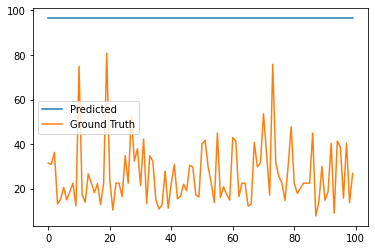

array([[96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96.5],
       [96

In [ ]:
score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))
yhat = model.predict(X_test)
yhat = y_scale.inverse_transform(yhat.reshape(-1, 1))
# yhat = y_scale.inverse_transform(yhat)
# y_test = y_scale.inverse_transform(y_test.reshape(-1, 1))
y_test = y_scale.inverse_transform(y_test)
plt.plot(yhat[-100:], label='Predicted')
plt.plot(y_test[-100:], label='Ground Truth')
plt.legend()
plt.show()
yhat